# Digit recognizer with logit

### Data exploration

In [138]:
import pandas as pd

df = pd.read_csv('data/train.csv')

In [139]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
df.shape

(42000, 785)

In [141]:
import matplotlib.pyplot as plt
import numpy as np

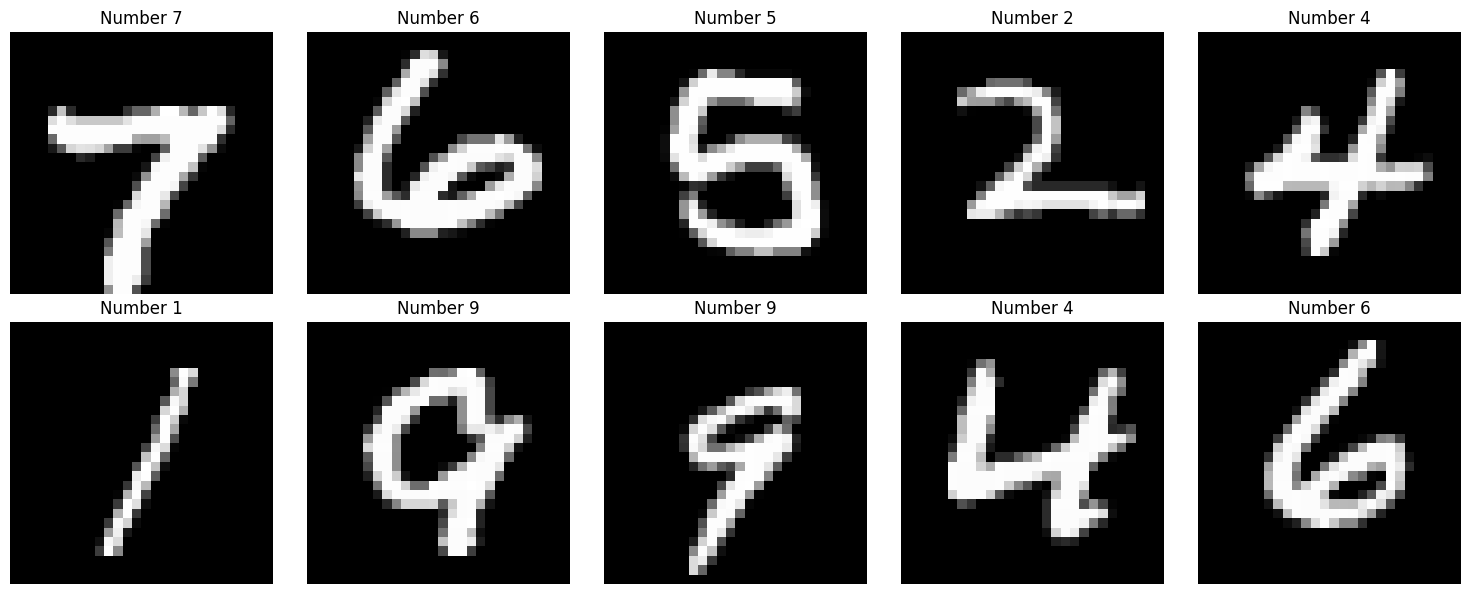

In [205]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
ax = ax.flatten()

for i in range(len(ax)):
    index = np.random.randint(0,785)
    number = df.iloc[index]['label']
    pixels = df.iloc[index].drop('label')
    ax[i].imshow(pixels.values.reshape(28,28), cmap='grey')
    ax[i].set_title(f'Number {number}')
    ax[i].axis('off')

plt.tight_layout()

In [143]:
import seaborn as sns

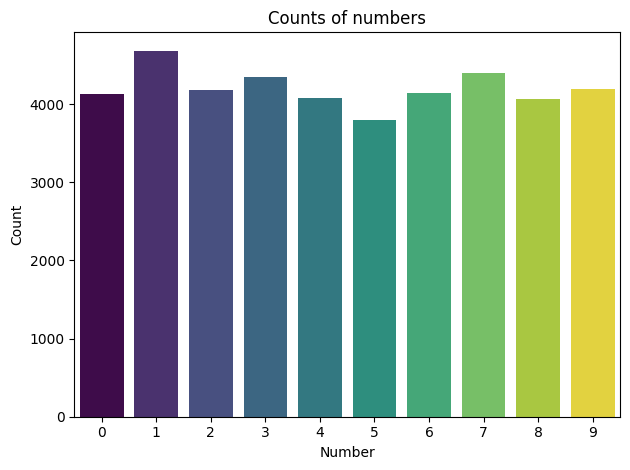

In [144]:
sns.countplot(data=df, x='label', palette='viridis', hue='label')
plt.title('Counts of numbers')
plt.xlabel('Number')
plt.ylabel('Count')
plt.legend([],[], frameon=False)
plt.tight_layout()

Dataset is not so unbalanced

### Logistic Regression

Set target and features

In [145]:
y = df['label']
X = df.drop(columns='label')

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1310)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [148]:
clf = Pipeline([
    #('scaler', StandardScaler()),
    ('logit_clf', LogisticRegression(solver='lbfgs', max_iter=400))
])

clf.fit(X_train, y_train)

/home/neville/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logit_clf', LogisticRegression(max_iter=400))])

In [149]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is {accuracy:0.4}')

The accuracy is 0.9069


Now we are going to test some numbers written by me.

In [206]:
from cvt_jpg2csv_greyscale import convert_image_to_csv, csv2dataframe_clf

In [207]:
for i in range(10):
    convert_image_to_csv('img/num'+str(i)+'.png', 'img/num'+str(i)+'.csv')

Conversion complete! CSV file saved as img/num0.csv
Conversion complete! CSV file saved as img/num1.csv
Conversion complete! CSV file saved as img/num2.csv
Conversion complete! CSV file saved as img/num3.csv
Conversion complete! CSV file saved as img/num4.csv
Conversion complete! CSV file saved as img/num5.csv
Conversion complete! CSV file saved as img/num6.csv
Conversion complete! CSV file saved as img/num7.csv
Conversion complete! CSV file saved as img/num8.csv
Conversion complete! CSV file saved as img/num9.csv


In [208]:
my_nums = pd.DataFrame(columns=df.columns)
for i in range(10):
    num_df = csv2dataframe_clf('img/num'+str(i)+'.csv', X.columns, i)
    my_nums = pd.concat([my_nums, num_df], ignore_index=True)

my_nums

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
my_nums_pred = clf.predict(my_nums.drop(columns='label'))
my_nums_accuracy = accuracy_score(my_nums['label'].to_list(), my_nums_pred)
print('The accuracy with my numbers is ' + str(my_nums_accuracy))

The accuracy with my numbers is 0.7


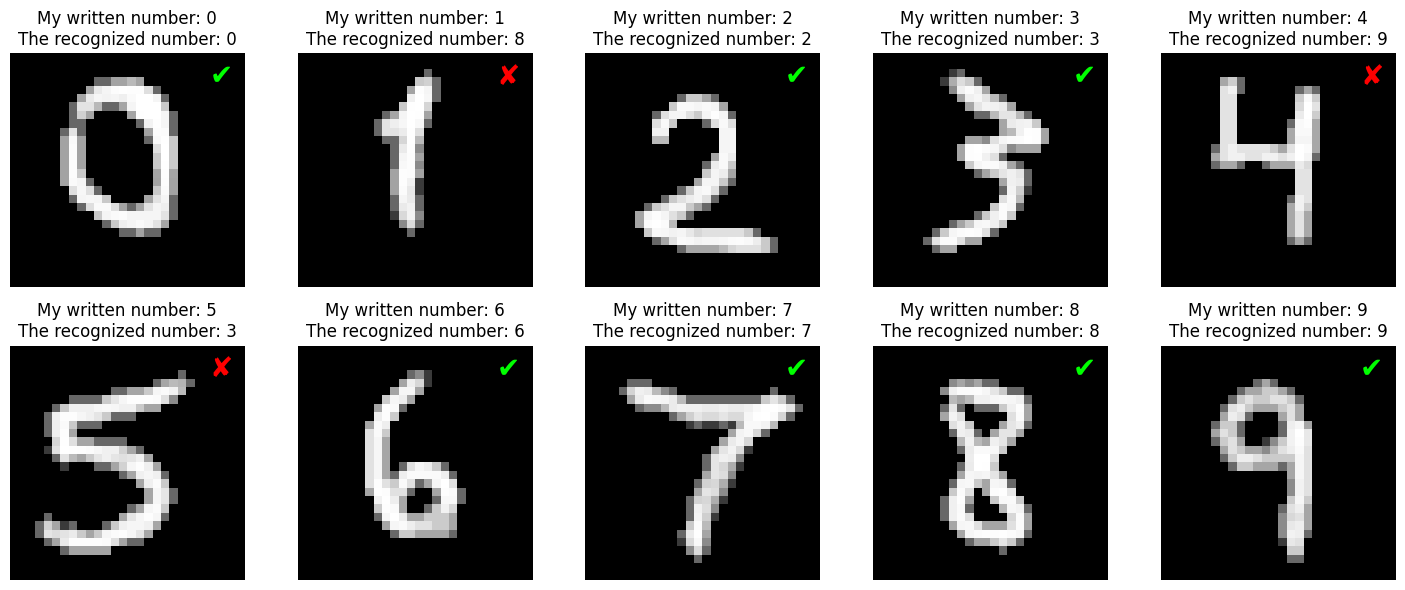

In [233]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
ax = ax.flatten()

for i in range(10):
    number = i
    pixels = my_nums.iloc[i].drop('label').astype('float')
    ax[i].imshow(pixels.values.reshape(28,28), cmap='grey')
    ax[i].set_title(f'My written number: {number}\nThe recognized number: {my_nums_pred[i]}')
    if number ==  my_nums_pred[i]:  # Example condition
        ax[i].text(0.9, 0.9, '✔', color='lime', fontsize=20, ha='center', va='center', transform=ax[i].transAxes)
    else:
        ax[i].text(0.9, 0.9, '✘', color='red', fontsize=20, ha='center', va='center', transform=ax[i].transAxes)

    ax[i].axis('off')

plt.subplots_adjust(hspace=1)
plt.tight_layout()

The dataframe has 42000 rows, representing the actual number (`label`) and the $28 \times 28$ pixels. Let's print some of them.